# data analysis and ml predicton on loan aproval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings("ignore")

# data import from csv file

In [2]:
df = pd.read_csv("./trainLoan.csv")
      

# data cleaning

<Axes: ylabel='count'>

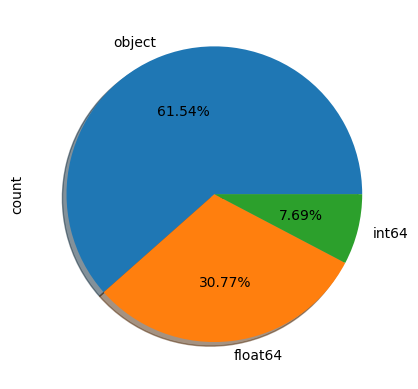

In [3]:
df.dtypes.value_counts().plot.pie(autopct = "%1.2f%%",shadow=True)

In [4]:
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
# we can see that 7 columns present null values

In [6]:
for i in df:
    print(df[i].isna().value_counts())  # checking for number of null values

Loan_ID
False    614
Name: count, dtype: int64
Gender
False    601
True      13
Name: count, dtype: int64
Married
False    611
True       3
Name: count, dtype: int64
Dependents
False    599
True      15
Name: count, dtype: int64
Education
False    614
Name: count, dtype: int64
Self_Employed
False    582
True      32
Name: count, dtype: int64
ApplicantIncome
False    614
Name: count, dtype: int64
CoapplicantIncome
False    614
Name: count, dtype: int64
LoanAmount
False    592
True      22
Name: count, dtype: int64
Loan_Amount_Term
False    600
True      14
Name: count, dtype: int64
Credit_History
False    564
True      50
Name: count, dtype: int64
Property_Area
False    614
Name: count, dtype: int64
Loan_Status
False    614
Name: count, dtype: int64


In [7]:
df.head() # as we see null value present in starting of column but not at the end of the column so bfill is done to insert nearest vlaue

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# droping the row from the table where the loan amount is not specified as it is one of the most important element in this analysis
for i in df.columns:
    if i=="LoanAmount":
        df.dropna(subset = ["LoanAmount"],axis = 0,inplace=True)
        continue
    if df[i].isna().any():
        df[i] = df[i].bfill()
# filling value at nan place using bfill


In [9]:
df.reset_index(inplace=True) # cleared

In [10]:
df.isna().any() # now no null value is present

index                False
Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

# EDA

# 1

69.43 % of person approved for loan


<Axes: xlabel='count', ylabel='Loan_Status'>

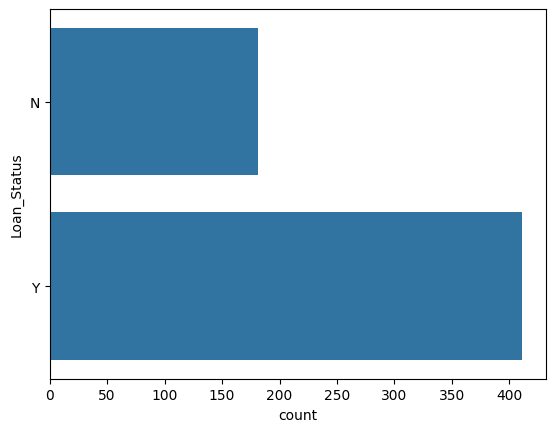

In [11]:
print(100*(df.Loan_Status.value_counts()["Y"]/df.index.size).round(4),"% of person approved for loan")
sns.countplot(df.Loan_Status)

# 2

In [12]:
df2 = df.groupby(["Gender","Loan_Status"])[["Gender","Loan_Status"]]
data = df2.value_counts()

Gender  Loan_Status
Female  N               36
        Y               74
Male    N              145
        Y              337
Name: count, dtype: int64

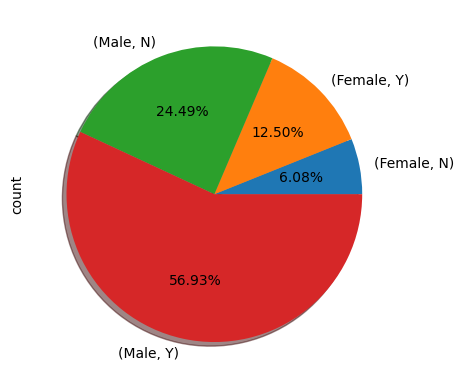

In [13]:
data.plot.pie(autopct="%1.2f%%",shadow=True)
data

In [14]:
#so from this observation we found that maximum number of male approved for loan about 56.3%
# and only 12.3% of loan is approved to female

# 3

Married  Loan_Status
No       N               75
         Y              132
Yes      N              106
         Y              279
Name: count, dtype: int64

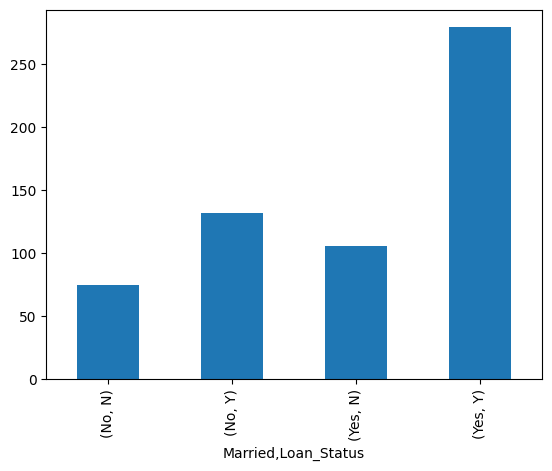

In [15]:
df3 = df.groupby(["Married","Loan_Status"])[["Married","Loan_Status"]]
data3 = df3.value_counts()

data3.plot.bar()
data3

In [16]:
# married person is more likely to be approved for loan 
print(100*(data3[("Yes","Y")]/df.index.size).round(4),"% of married persons has been approved for loan")

47.13 % of married persons has been approved for loan


# 4

<Axes: ylabel='count'>

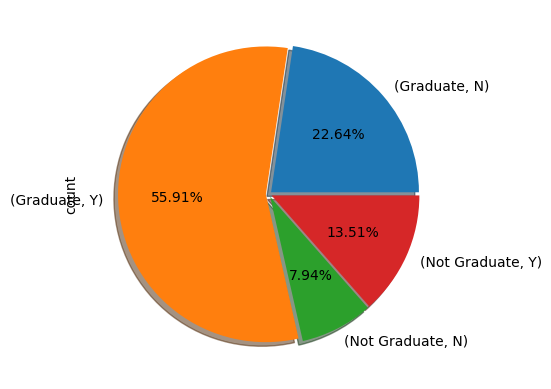

In [17]:
df4 = df.groupby(["Education","Loan_Status"])[["Education","Loan_Status"]]
data4 = df4.value_counts()
data4.plot.pie(explode=[0.02,0.02,0.02,0.02],shadow=True,autopct="%1.2f%%")

In [18]:
# so 55.37% of loan approved to educated persons

# 5

In [19]:
df5 = df[["LoanAmount","Loan_Status"]]
df5 = df5[df5["Loan_Status"]=="Y"]["LoanAmount"]
print("the highest amount of loan approved is",df5.max())
print("the lowest amount of loan approved is",df5.min())
print("the average of loan approved is",df5.mean().round(2))

the highest amount of loan approved is 700.0
the lowest amount of loan approved is 17.0
the average of loan approved is 144.29


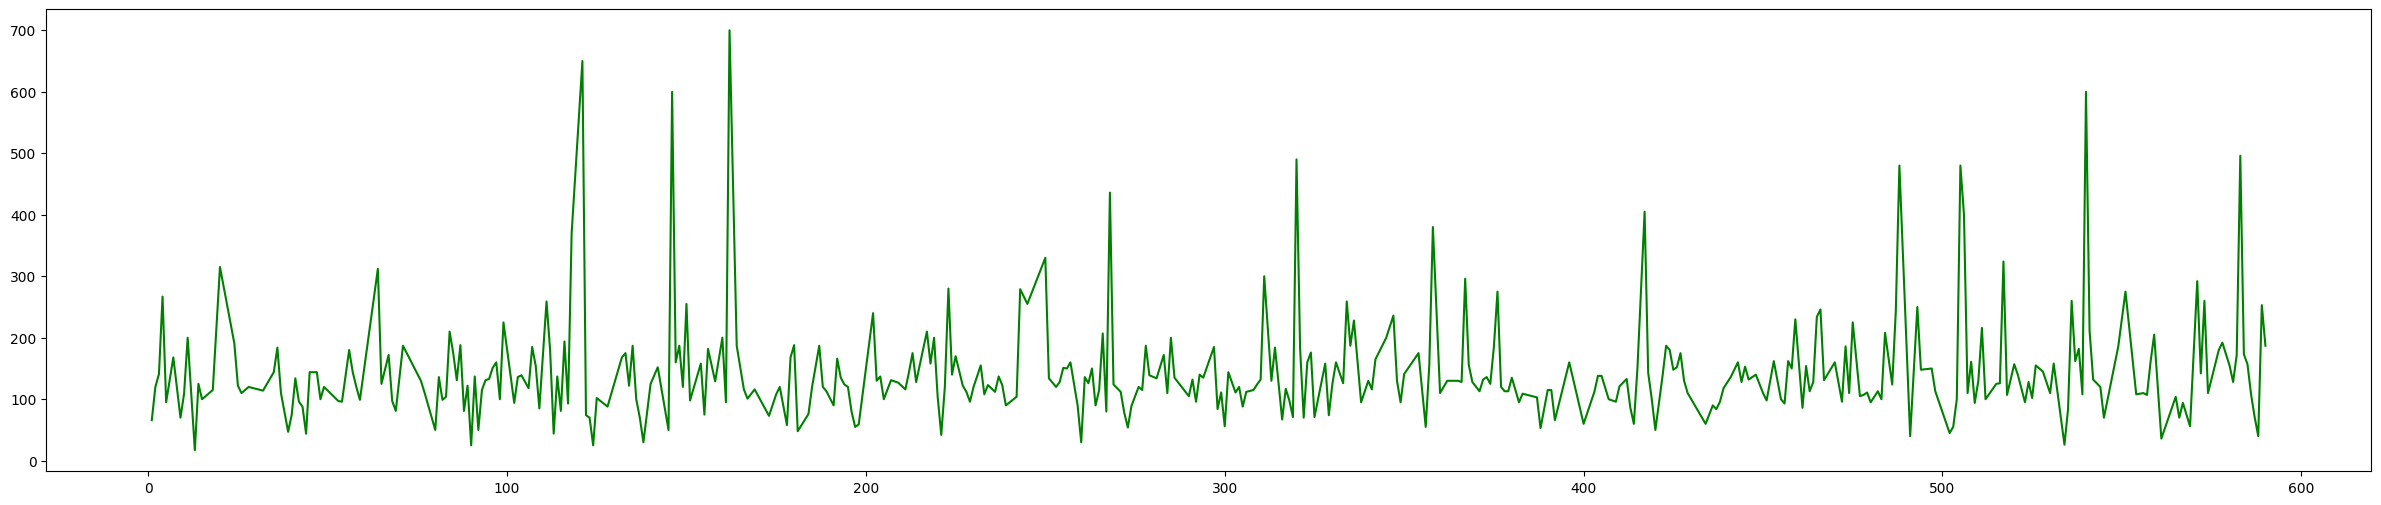

In [20]:
plt.figure(figsize=(30,6))
plt.plot(df5,color="g")

# 6

<Axes: xlabel='Loan_Amount_Term'>

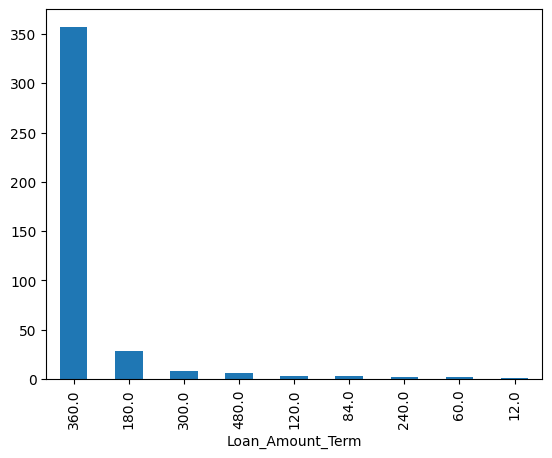

In [21]:
df6 = df[["Loan_Amount_Term","Loan_Status"]]
df6=df6[df6["Loan_Status"]=="Y"].iloc[:,0]
df6.value_counts().plot.bar()

In [22]:
print(df6.value_counts().index[0],"is the most approved loan amount term")
print("the highest amount of loan amount term has been approved is",df6.max())
print("the minimum amount of loan amount term has been approved is",df6.min())

360.0 is the most approved loan amount term
the highest amount of loan amount term has been approved is 480.0
the minimum amount of loan amount term has been approved is 12.0


# 7

In [23]:
df7 = df[["ApplicantIncome","Property_Area","Loan_Status"]]
df7 = df7[df7["Loan_Status"]=="Y"][["ApplicantIncome","Property_Area"]]
group =df7.groupby("Property_Area")
print("minimum income requared for loan approval by area\n",group.min())
print("maximum income requared for loan approval by area\n",group.max())

minimum income requared for loan approval by area
                ApplicantIncome
Property_Area                 
Rural                      645
Semiurban                  210
Urban                     1299
maximum income requared for loan approval by area
                ApplicantIncome
Property_Area                 
Rural                    23803
Semiurban                39999
Urban                    63337


<Axes: title={'center': 'maximum income'}, xlabel='Property_Area'>

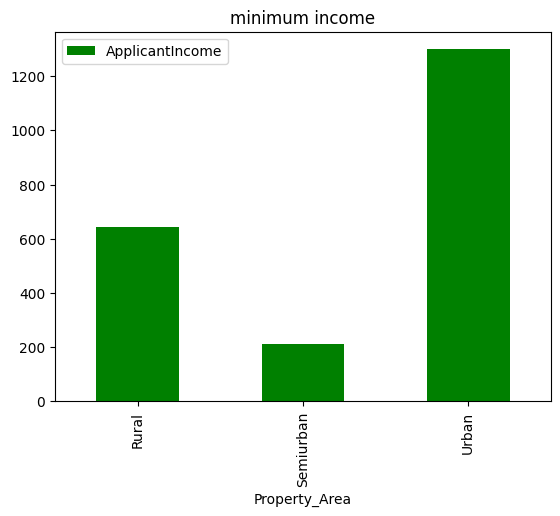

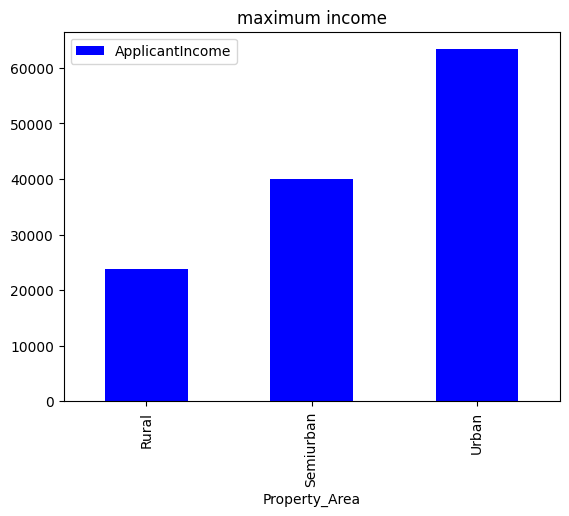

In [24]:
group.min().plot.bar(color="g",title="minimum income")
group.max().plot.bar(color="b",title = "maximum income")

# 8

Text(0.5, 1.0, 'loan approved per area type')

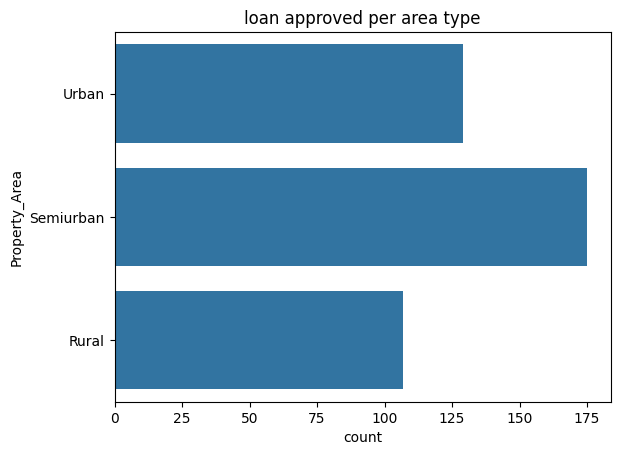

In [25]:
df8 = df[["Property_Area","Loan_Status"]]
df8 = df8[df8["Loan_Status"]=="Y"]["Property_Area"]
sns.countplot(df8)
plt.title("loan approved per area type")

In [26]:
# so from the observation we conclude that semiurban people get higher loan approval
df8.value_counts() # number of people approved for loan from areas

Property_Area
Semiurban    175
Urban        129
Rural        107
Name: count, dtype: int64

<Axes: title={'center': 'loan approved per area type'}, ylabel='count'>

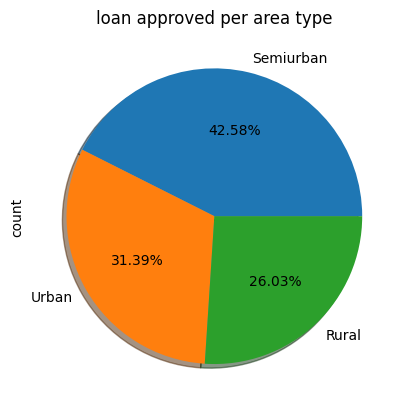

In [27]:
df8.value_counts().plot.pie(autopct="%1.2f%%",shadow=True,title = "loan approved per area type")

# 9

<Axes: title={'center': 'loan approved per marital status and area'}, ylabel='count'>

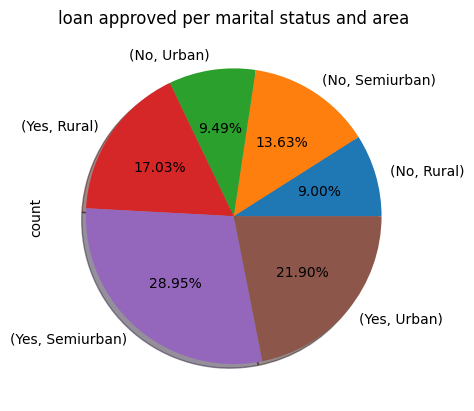

In [28]:
df9 = df[["Married","Property_Area","Loan_Status"]]
df9 = df9[df9["Loan_Status"]=="Y"][["Married","Property_Area"]]
group = df9.groupby(["Married","Property_Area"])
group.value_counts().plot.pie(autopct="%1.2f%%",shadow=True,title="loan approved per marital status and area")

In [29]:
group.value_counts()

Married  Property_Area
No       Rural             37
         Semiurban         56
         Urban             39
Yes      Rural             70
         Semiurban        119
         Urban             90
Name: count, dtype: int64

In [30]:
# from the above observation married and semiurban people got more loan approved
# and unmarried and rural people get less loan approved

# 10

In [31]:
df10 = df[df["Loan_Status"]=="Y"][["Self_Employed","Education"]]
group = df10.groupby(["Self_Employed","Education"])
group.value_counts()

Self_Employed  Education   
No             Graduate        285
               Not Graduate     70
Yes            Graduate         46
               Not Graduate     10
Name: count, dtype: int64

<Axes: xlabel='Self_Employed,Education'>

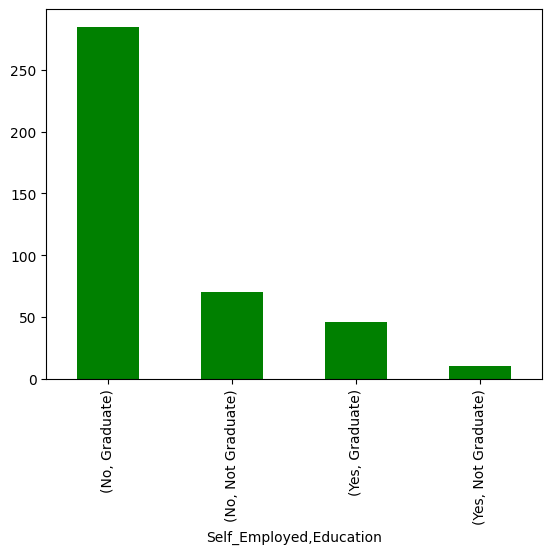

In [32]:
group.value_counts().plot.bar(color="g")

In [33]:
# from above analysis we observed that non self employed and graduate people got more loan approval
# while self employed and non graduate got less loan approved

# 11

In [34]:
print("number of people who live in rural area and income more than 5000 approved for loan")
df11 = df[df["Loan_Status"]=="Y"][["ApplicantIncome","Property_Area"]]
df11 = df11[df11["ApplicantIncome"]>=5000]["Property_Area"]
df11.value_counts()["Rural"]

number of people who live in rural area and income more than 5000 approved for loan


38

# 12

In [35]:
for i in df.loc[:,["Gender","Married","Education","Self_Employed","Property_Area"]]:
    group= df.groupby("Loan_Status")[i]
    counts = (group.value_counts(normalize=True)*100).round(2).astype("str")+" %"
    print(counts)
    print()

Loan_Status  Gender
N            Male      80.11 %
             Female    19.89 %
Y            Male       82.0 %
             Female     18.0 %
Name: proportion, dtype: object

Loan_Status  Married
N            Yes        58.56 %
             No         41.44 %
Y            Yes        67.88 %
             No         32.12 %
Name: proportion, dtype: object

Loan_Status  Education   
N            Graduate        74.03 %
             Not Graduate    25.97 %
Y            Graduate        80.54 %
             Not Graduate    19.46 %
Name: proportion, dtype: object

Loan_Status  Self_Employed
N            No               85.08 %
             Yes              14.92 %
Y            No               86.37 %
             Yes              13.63 %
Name: proportion, dtype: object

Loan_Status  Property_Area
N            Rural            36.46 %
             Urban            34.25 %
             Semiurban        29.28 %
Y            Semiurban        42.58 %
             Urban            31.39 %
     

Graphical show


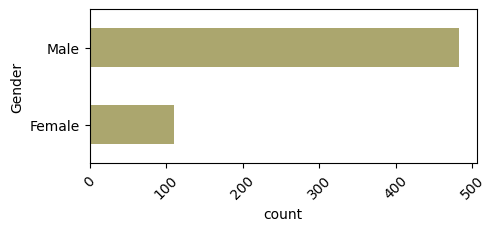

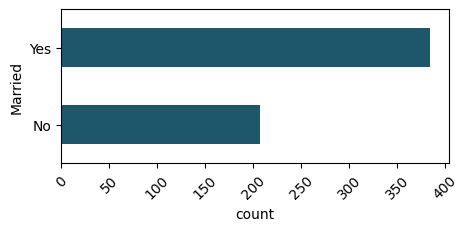

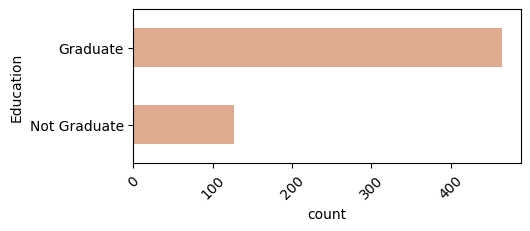

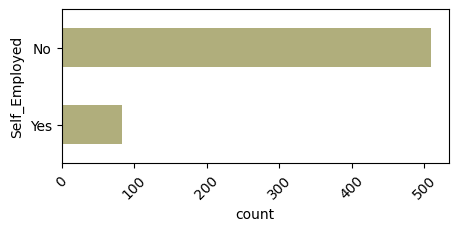

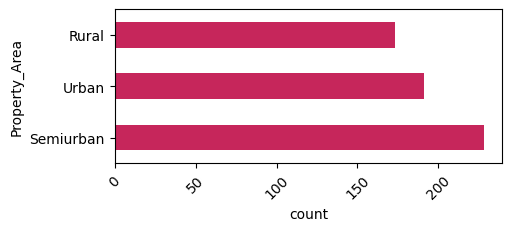

In [36]:
print("Graphical show")
for i in df.loc[:,["Gender","Married","Education","Self_Employed","Property_Area"]]:
    plt.figure(figsize=(5,2))
    sns.countplot(data=df,y=i,width=0.5,color=np.random.rand(3))
    plt.xticks(rotation = 45)
    plt.show()

# 13

from the above graph we found that the applicant income is more valueable for loan approval than coapplicant income.


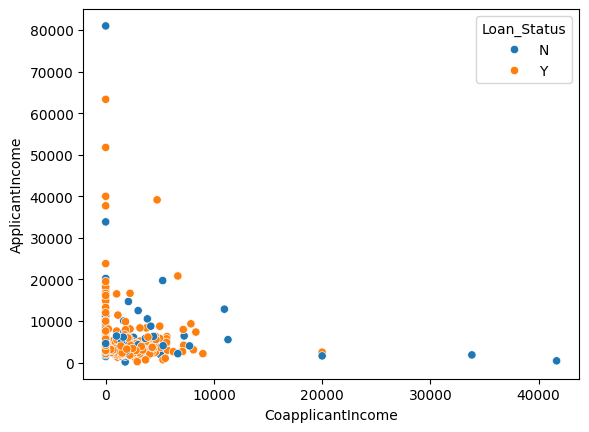

In [37]:
sns.scatterplot(data = df,x="CoapplicantIncome",y="ApplicantIncome",hue="Loan_Status")
print("from the above graph we found that the applicant income is more valueable for loan approval than coapplicant income.")

# 14

from the graph we found that credit history of maximum applicant is 1


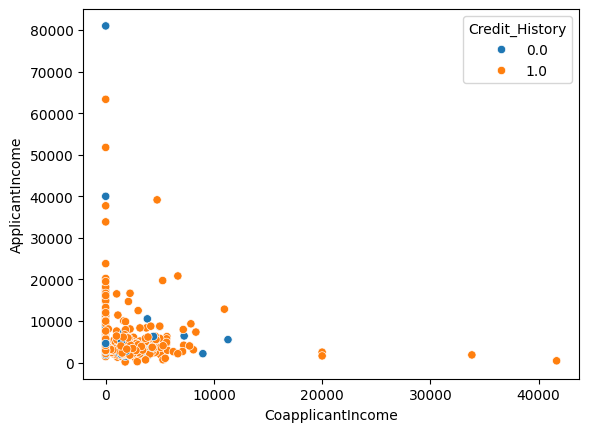

In [38]:
sns.scatterplot(data = df,x="CoapplicantIncome",y="ApplicantIncome",hue="Credit_History")
print("from the graph we found that credit history of maximum applicant is 1")

# 15

In [39]:
# if the interest rate is 8% then consider the loan term as day so we need to convert it to months
# to find the total amount to pay after taking loan we have formula I = P*T*R/100 (t time in months, r = 8.0, I = total amount to pay) 

In [40]:
data = df[["Loan_ID","LoanAmount",'Loan_Amount_Term']]

data["Loan_Amount_Term"]=data["Loan_Amount_Term"]/30
amountToPay = {}
IR=8.0 # interest rate
for i in data.index:
    interest = data.loc[i,"LoanAmount"]*data.loc[i,"Loan_Amount_Term"]*(IR/100)  # i=ptr here is the interest 
    # to find total amount to pay we add interest with principal amount
    amountToPay[data.loc[i,"Loan_ID"]] = round(interest+data.loc[i,"LoanAmount"],2)

In [41]:
amountToPay # the total amount to pay after taking loan with interest

{'LP001003': 250.88,
 'LP001005': 129.36,
 'LP001006': 235.2,
 'LP001008': 276.36,
 'LP001011': 523.32,
 'LP001013': 186.2,
 'LP001014': 309.68,
 'LP001018': 329.28,
 'LP001020': 684.04,
 'LP001024': 137.2,
 'LP001027': 213.64,
 'LP001028': 392.0,
 'LP001029': 223.44,
 'LP001030': 22.44,
 'LP001032': 245.0,
 'LP001034': 164.0,
 'LP001036': 148.96,
 'LP001038': 260.68,
 'LP001041': 225.4,
 'LP001043': 203.84,
 'LP001046': 617.4,
 'LP001047': 227.36,
 'LP001050': 219.52,
 'LP001052': 295.96,
 'LP001066': 374.36,
 'LP001068': 239.12,
 'LP001073': 215.6,
 'LP001086': 68.6,
 'LP001087': 235.2,
 'LP001091': 393.96,
 'LP001095': 145.04,
 'LP001097': 207.76,
 'LP001098': 223.44,
 'LP001100': 627.2,
 'LP001109': 196.0,
 'LP001112': 282.24,
 'LP001114': 360.64,
 'LP001116': 215.6,
 'LP001119': 156.8,
 'LP001120': 92.12,
 'LP001123': 147.0,
 'LP001131': 262.64,
 'LP001136': 188.16,
 'LP001137': 172.48,
 'LP001138': 86.24,
 'LP001144': 282.24,
 'LP001146': 235.2,
 'LP001151': 282.24,
 'LP001155': 

# 16

In [42]:
print("The profit gained by bank if everyone approved for loan",end=": ")
nominalGain = np.array(list(amountToPay.values())) - np.array(data["LoanAmount"])
print(nominalGain.sum().round(3))

The profit gained by bank if everyone approved for loan: 79502.53


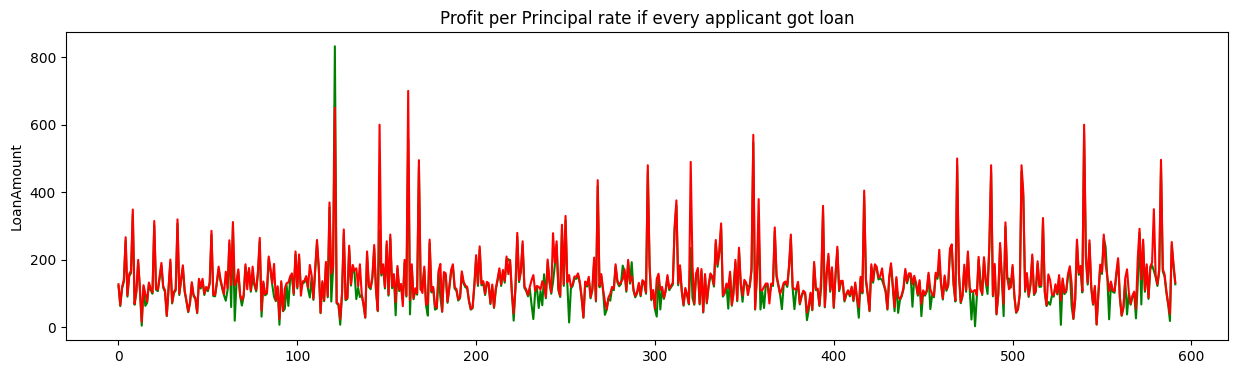

In [43]:
plt.figure(figsize=(15,4))
sns.lineplot(nominalGain,color="green")
sns.lineplot(data["LoanAmount"],color="red")
plt.title("Profit per Principal rate if every applicant got loan")
plt.show()


# 17

In [44]:
print("Actual profit (from applicants who have been approved from loan)")
approvedApplicant = df[df["Loan_Status"]=="Y"]["Loan_ID"]

appID = pd.DataFrame(approvedApplicant).set_index(approvedApplicant)
appAmount = df[df["Loan_Status"]=="Y"]["LoanAmount"]
ActualPayments = pd.DataFrame(amountToPay.values(),columns=["Profit"],index=amountToPay.keys()).merge(appID,how="inner",left_index=True,right_index=True)
# actula payment is the payment which is to done to the bank from loan borrower
ActualPayments.set_index(np.arange(ActualPayments.index.size),inplace=True)
actualProfit = ActualPayments["Profit"] - pd.Series(list(appAmount))#actual profit by bank from applicant being eligible for loan
actualProfit.sum().round(3)

Actual profit (from applicants who have been approved from loan)


54191.04

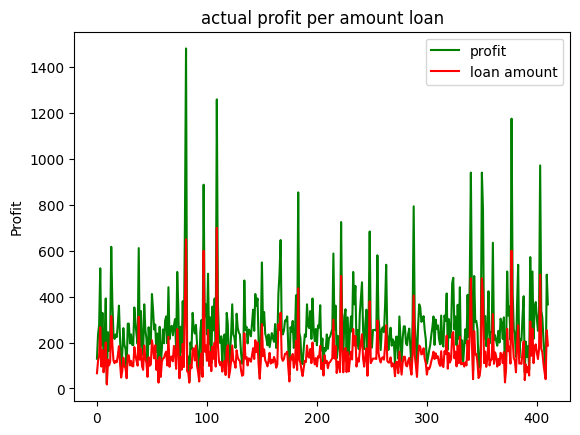

In [45]:
sns.lineplot(ActualPayments["Profit"],color="g",label="profit")
sns.lineplot(pd.Series(list(appAmount)),color="r",label="loan amount")
plt.title("actual profit per amount loan")
plt.show()

# 18

In [46]:
print("the difference of assumed profit - actal profit:",nominalGain.sum() - actualProfit.sum())
print("so this much profit the bank loose if every applicant not approved for loan")

the difference of assumed profit - actal profit: 25311.48999999999
so this much profit the bank loose if every applicant not approved for loan


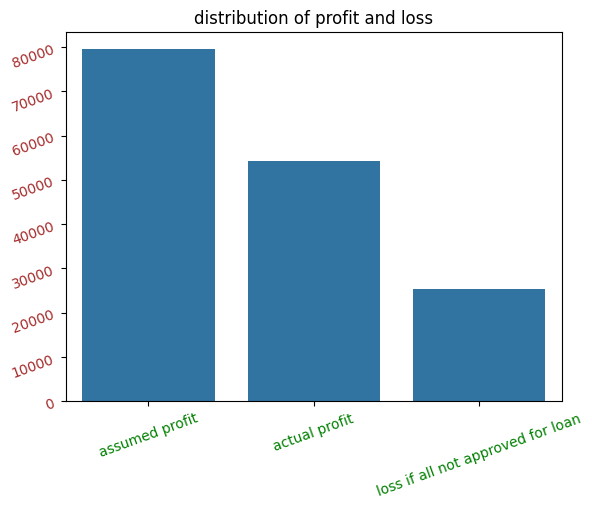

In [47]:
sns.barplot(x=["assumed profit","actual profit","loss if all not approved for loan"],y=[nominalGain.sum(),actualProfit.sum(),nominalGain.sum() - actualProfit.sum()])
plt.xticks(rotation=20,color="green")
plt.yticks(rotation=20,color="brown")

plt.title("distribution of profit and loss")
plt.show()

# 19

Text(0.5, 1.0, 'distribution of applicant income')

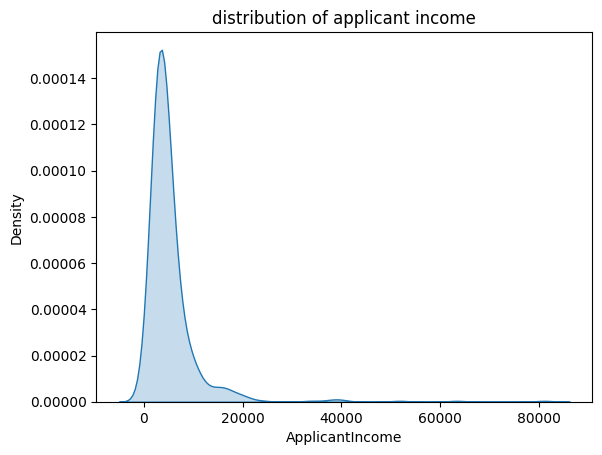

In [48]:
sns.kdeplot(df["ApplicantIncome"],shade=True)
plt.title("distribution of applicant income")

Text(0.5, 1.0, 'distribution of loan amount')

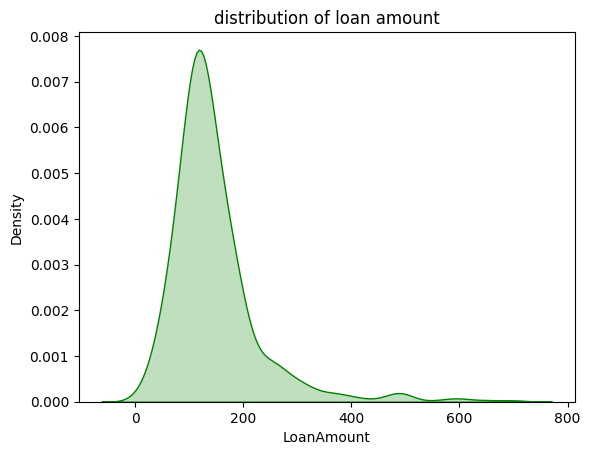

In [49]:
sns.kdeplot(df["LoanAmount"],shade=True,color="g")
plt.title("distribution of loan amount")

Text(0.5, 1.0, 'distribution of payement to bank from borrower')

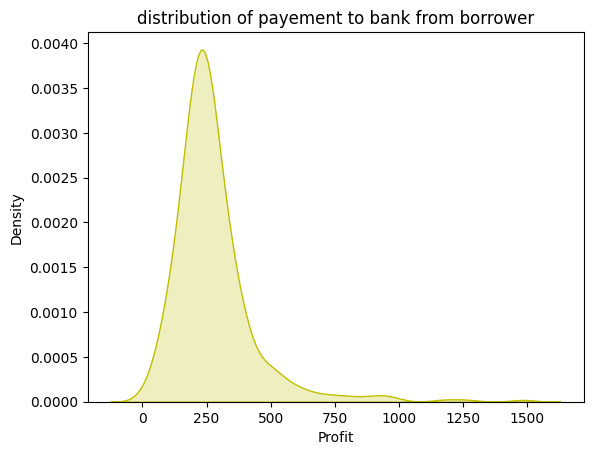

In [50]:
sns.kdeplot(ActualPayments["Profit"],shade=True,color="y")
plt.title("distribution of payement to bank from borrower")

In [51]:
df.columns

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 1.0, 'Applicant income per Loan amount')

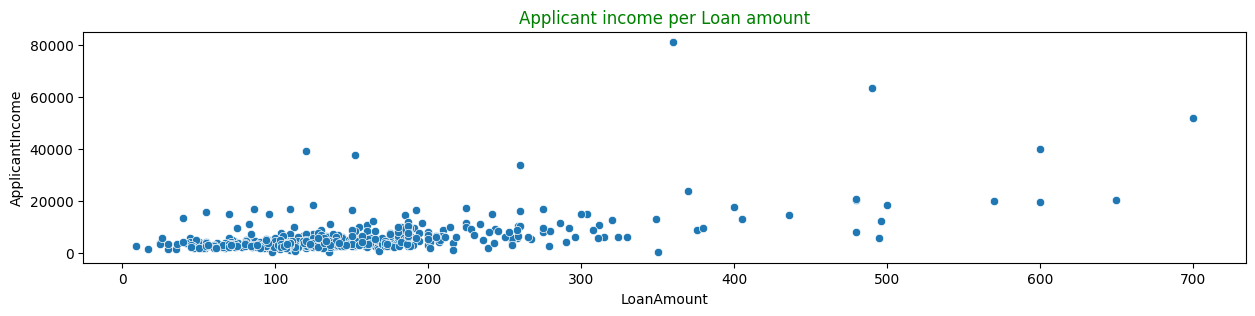

In [52]:

plt.figure(figsize=(15,3))
sns.scatterplot(x = df["LoanAmount"],y= df["ApplicantIncome"])
plt.title("Applicant income per Loan amount",color="g")

Text(0.5, 1.0, 'distribution of coapplicant income using violin plot')

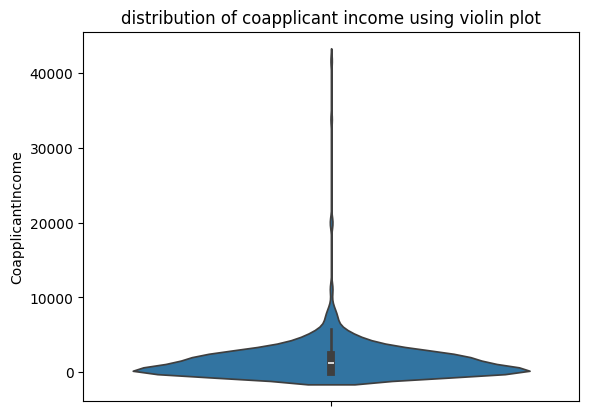

In [53]:
sns.violinplot(df.CoapplicantIncome)
plt.title("distribution of coapplicant income using violin plot")

# 20
# feature engineering or converting categorical value to numerical values

importing test data from mysql

In [54]:
# before the feature engineering i would like to import the test data from sql
con = mysql.connector.connect(user="root",password="Surya163*",database="LoanDB",host="localhost")
cursor = con.cursor()

def execute(q):
    cursor.execute(q)
    return cursor.fetchall()

In [55]:
testData = execute("select * from testloan;")

In [57]:
columnName = execute("desc testloan;")
con.close()

In [58]:
columns = [i[0] for i in columnName]

In [59]:
columns # we have column names from test table now making a data frame

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [60]:
testDF = pd.DataFrame(testData,columns = columns)
backuptestdf = testDF.copy()

In [61]:
testDF.head() #data frame created

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Now we will do feature transformation using label encoder to make categoriaca value to numerical value.
from the both table laon id is not usable lets drop that column


In [62]:
testDF.drop("Loan_ID",inplace=True,axis = 1)
df.drop("Loan_ID",inplace=True,axis = 1)

In [63]:
# now making label encoder instance
internal_rout={}
encoded_rout = {}
backup = df.copy()

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in testDF[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]:
    testDF[i] = en.fit_transform(testDF[i])
    df[i]=en.transform(df[i])
    for j in df[i].index:
        internal_rout[backup.loc[j,i]] = df.loc[j,i]
    encoded_rout[i]=internal_rout
    internal_rout={}

In [64]:
encoded_rout

{'Gender': {'Male': 1, 'Female': 0},
 'Married': {'Yes': 1, 'No': 0},
 'Dependents': {'1': 1, '0': 0, '2': 2, '3+': 3},
 'Education': {'Graduate': 0, 'Not Graduate': 1},
 'Self_Employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Rural': 0, 'Urban': 2, 'Semiurban': 1}}

In [65]:
df.drop("index",axis=1,inplace=True)

In [66]:
testDF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [67]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [68]:
backup.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [69]:
# finaly need to conver the loan status column to int
df["Loan_Status"]=en.fit_transform(df["Loan_Status"])
df["Loan_Status"] # so here loan status 0 stands for no and 1 stands for yes

0      0
1      1
2      1
3      1
4      1
      ..
587    1
588    1
589    1
590    1
591    0
Name: Loan_Status, Length: 592, dtype: int32

# using machine learing techniques to to predict (classification)

In [70]:
# applying machine learnig algorithms for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,classification_report,accuracy_score

In [71]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
def find_report(model,x,y):
    print("Accuracy Score\n",accuracy_score(model.predict(x),y))
    print("\nconfusion matrix\n",confusion_matrix(model.predict(x),y))
    print("\nF1 score\n",f1_score(model.predict(x),y))
    print("\nClassification Report\n",classification_report(model.predict(x),y))

# decission tree

In [72]:
dt = DecisionTreeClassifier(splitter="random")
dt.fit(x,y)
find_report(dt,x,y)

Accuracy Score
 1.0

confusion matrix
 [[181   0]
 [  0 411]]

F1 score
 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       411

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



In [73]:
"the decission tree model is over fitted so trying another classifier"

'the decission tree model is over fitted so trying another classifier'

# knn

In [74]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(x,y)
find_report(kn,x,y)

Accuracy Score
 0.8023648648648649

confusion matrix
 [[181 117]
 [  0 294]]

F1 score
 0.8340425531914893

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.61      0.76       298
           1       0.72      1.00      0.83       294

    accuracy                           0.80       592
   macro avg       0.86      0.80      0.79       592
weighted avg       0.86      0.80      0.79       592



In [75]:
# so knn has a accuracy score of 80%

# svc

In [76]:
svc = SVC(C=2)
svc.fit(x,y)
find_report(svc,x,y)

Accuracy Score
 0.7010135135135135

confusion matrix
 [[  4   0]
 [177 411]]

F1 score
 0.8228228228228228

Classification Report
               precision    recall  f1-score   support

           0       0.02      1.00      0.04         4
           1       1.00      0.70      0.82       588

    accuracy                           0.70       592
   macro avg       0.51      0.85      0.43       592
weighted avg       0.99      0.70      0.82       592



In [77]:
# so svc has a score of 70% accuracy

# using gaussian naive bayes

In [78]:
nv = GaussianNB()
nv.fit(x,y)
find_report(nv,x,y)

Accuracy Score
 0.7956081081081081

confusion matrix
 [[ 86  26]
 [ 95 385]]

F1 score
 0.8641975308641975

Classification Report
               precision    recall  f1-score   support

           0       0.48      0.77      0.59       112
           1       0.94      0.80      0.86       480

    accuracy                           0.80       592
   macro avg       0.71      0.78      0.73       592
weighted avg       0.85      0.80      0.81       592



# using bernoullinb

In [79]:
bnb = BernoulliNB()
bnb.fit(x,y)
find_report(bnb,x,y)

Accuracy Score
 0.8074324324324325

confusion matrix
 [[ 80  13]
 [101 398]]

F1 score
 0.8747252747252747

Classification Report
               precision    recall  f1-score   support

           0       0.44      0.86      0.58        93
           1       0.97      0.80      0.87       499

    accuracy                           0.81       592
   macro avg       0.71      0.83      0.73       592
weighted avg       0.89      0.81      0.83       592



In [80]:
# both naive bayes has a lower efficiency of 80%

# using logistic regression

In [81]:
lr = LogisticRegression()
lr.fit(x,y)
find_report(lr,x,y)

Accuracy Score
 0.8074324324324325

confusion matrix
 [[ 82  15]
 [ 99 396]]

F1 score
 0.8741721854304636

Classification Report
               precision    recall  f1-score   support

           0       0.45      0.85      0.59        97
           1       0.96      0.80      0.87       495

    accuracy                           0.81       592
   macro avg       0.71      0.82      0.73       592
weighted avg       0.88      0.81      0.83       592



# ensemble learn using random forest

In [82]:
# still we got 80% of accuracy
# so new we will be using ensemble learning to improve efficiency of learner
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x,y)
find_report(rf,x,y)

Accuracy Score
 0.981418918918919

confusion matrix
 [[175   5]
 [  6 406]]

F1 score
 0.9866342648845686

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       180
           1       0.99      0.99      0.99       412

    accuracy                           0.98       592
   macro avg       0.98      0.98      0.98       592
weighted avg       0.98      0.98      0.98       592



In [83]:
# from this model we found the accuracy of 98%
# so using random forest we will predict 

# now predicting for test data

In [84]:
xtest = testDF.values
ytest = rf.predict(xtest)
ytest=list(ytest)
for i in range(len(ytest)):
    if ytest[i]==1:
        ytest[i]="Y"
    elif ytest[i]==0:
        ytest[i]='N'
backuptestdf["Loan_Status"]=ytest
backuptestdf.to_csv("loanTestData.csv",index=False)# making a csv file of test data along with the loan status

In [85]:
encoded_rout

{'Gender': {'Male': 1, 'Female': 0},
 'Married': {'Yes': 1, 'No': 0},
 'Dependents': {'1': 1, '0': 0, '2': 2, '3+': 3},
 'Education': {'Graduate': 0, 'Not Graduate': 1},
 'Self_Employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Rural': 0, 'Urban': 2, 'Semiurban': 1}}

# prediction by user input

In [88]:
def predict():
    while True:
        gndr = int(input(f"Enter your Gender: {encoded_rout['Gender']}"))
        mrd = int(input(f"Are you married? {encoded_rout['Married']}"))
        dp = int(input(f"Dependents? {encoded_rout['Dependents']}"))
        edu = int(input(f"Are you a Graduate? {encoded_rout['Education']}"))
        se = int(input(f"Are you self employed: {encoded_rout['Self_Employed']}"))
        inc = int(input(f"Applicant income?"))
        cinc = int(input(f"Co-applicant income:"))
        loan = int(input(f"Loan mount: "))
        term = int(input(f"Loan Term: "))
        ch = int(input(f"Credit History: "))
        pa = int(input(f"Property area: {encoded_rout['Property_Area']}"))
        output = rf.predict(np.array([gndr,mrd,dp,edu,se,inc,cinc,loan,term,ch,pa]).reshape(1,-1))
        if output ==1:
            print("\nYour loan will be approved\n")
        else:
            print("\nYou are not elegible for loan\n")
        
        q = int(input("enter 1 to quit 0 to continue:"))
        if q==1:
            break

# run the code to predict

In [90]:
predict()

Enter your Gender: {'Male': 1, 'Female': 0} 1
Are you married? {'Yes': 1, 'No': 0} 1
Dependents? {'1': 1, '0': 0, '2': 2, '3+': 3} 1
Are you a Graduate? {'Graduate': 0, 'Not Graduate': 1} 1
Are you self employed: {'No': 0, 'Yes': 1} 1
Applicant income? 3000
Co-applicant income: 100
Loan mount:  2000
Loan Term:  1
Credit History:  3
Property area: {'Rural': 0, 'Urban': 2, 'Semiurban': 1} 2



You are not elegible for loan



enter 1 to quit 0 to continue: 1
